# Actividad

- **Nombre**: Andrea Yamileth Florencia Ortiz
- **Matrícula**: A00830159

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.


**Presion Arterial**

1. Carga los datos del archivo **presion.csv**

In [2]:
# Si trabajamos en Google Colaboratory corremos las siguientes lineas de código
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Nos cambiamos a la carpeta donde tengamos el repositorio
%cd 'drive/MyDrive/SemanaTec/Repos/arte-analitica'

/content/drive/MyDrive/SemanaTec/Repos/arte-analitica


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [5]:
# Vamos a cargar una tabla con datos sobre presion
presion = pd.read_csv('data/presion.csv')

presion = presion.iloc[:, 0:2]
presion.head()

,edad,presion
0,56,148
1,45,120
2,72,159
3,36,118
4,63,146


2. Gráfica la información en el eje de las x la edad  y en el eje y la presión


Text(0.5, 1.0, 'Presión respecto a la Edad')

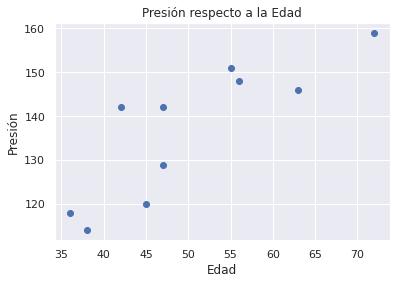

In [7]:
x= presion['edad']
y= presion['presion']
plt.scatter(x, y);
plt.ylabel('Presión')
plt.xlabel('Edad')
plt.title('Presión respecto a la Edad')

3. Genera una regresión líneal para obtener una aproximación de la ecuación 
$$
y = ax + b
$$
donde $ a $ se conoce comúnmente como * pendiente *, y $ b $ se conoce comúnmente como * intersección *.

¿Cuál es el valor de a y cuál es el valor de b?

In [9]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     1.1483331897665603
Model intercept: 79.36850719269533


4. Gráfica los datos reales vs modelo obtenido. 

Se debe visualizar los datos reales ( azules) 
Recta del modelo ( negra) 
Distancias ( verde ) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


Text(0.5, 1.0, 'Presión respecto a la edad')

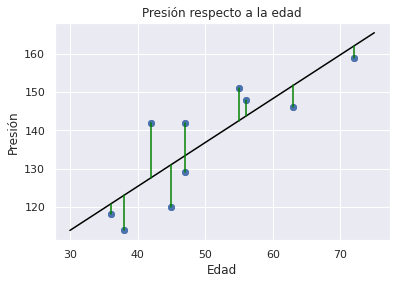

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(30, 75, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color="black");
plt.plot(x,y, 'o')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="green");
plt.xlabel('Edad')
plt.ylabel('Presión')
plt.title('Presión respecto a la edad')

4. ¿Cuál es la presión arterial esperada para una persona de 76 años?

Genera una función que calcule lo anterior

In [ ]:
edad_calcular=76

def presion(edad):
  y = model.coef_[0] * edad + model.intercept_
  return y

presion(edad_calcular)

166.6418296149539

**Ventas de mi negocio**

Nuestro objetivo será contruir un modelo que prediga las ventas del producto dependiendo de cuánto presupuesto se gaste en cada medio.

1. Carga los datos del archivo AdvmiNegocio.csv

In [11]:
# Vamos a cargar una tabla con datos sobre presion
advmi = pd.read_csv('data/AdvmiNegocio.csv')
advmi = advmi.iloc[:, 1::]
advmi.head()

,Redes,Youtube,TV,sales
0,6903,1134,2076,663
1,1335,1179,1353,312
2,516,1377,2079,279
3,4545,1239,1755,555
4,5424,324,1752,387


2. Generar una grafica para visuaizar  cómo se relaciona cada columna de presupuesto contra las ventas. De mi negocio. ( Redes,Youtube,TV)


Text(0.5, 1.0, 'Ventas contra Presupuesto TVS')

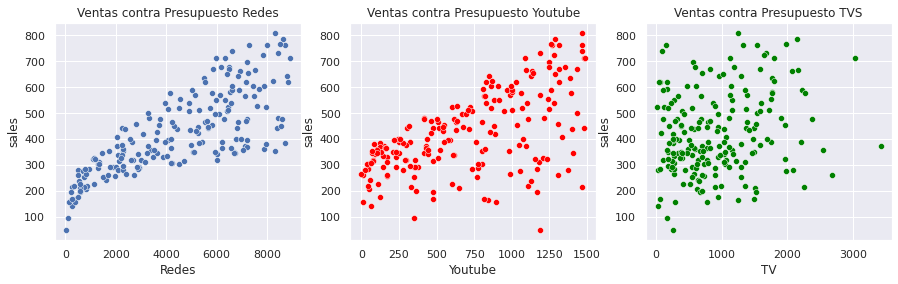

In [13]:
# Vamos a ver cómo se relaciona cada columna de presupuesto contra las ventas.
# Grafiquemos en una misma figura las tres relaciones.
fig, axs = plt.subplots(1, 3, figsize=(15,4))

# axs son nuestros espacios para graficar. Tenemos 3 espacios.

# Redes
#axs[0] nos dice que vamos a graficar en el primer espacio.
sns.scatterplot(data=advmi, x='Redes',y='sales', ax=axs[0])
axs[0].set_title('Ventas contra Presupuesto Redes')
# Youtube
#axs[1] nos dice que vamos a graficar en el segundo espacio.
sns.scatterplot(data=advmi, x='Youtube',y='sales', ax=axs[1], color='red')
axs[1].set_title('Ventas contra Presupuesto Youtube')
# TV
sns.scatterplot(data=advmi, x='TV',y='sales', ax=axs[2], color='green')
axs[2].set_title('Ventas contra Presupuesto TVS')

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

Que las redes es el mejor medio de publicidad para predecir las ventas

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para Redes vs Ventas, TV vs Ventas y YouTube vs Ventas?

In [ ]:
# La función para implementar una regresión lineal en Python
from sklearn.linear_model import LinearRegression

# Con esta función, podemos calcular los coeficientes para cada una de las variables

# Televisión
lm1 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm1.fit(advmi[['TV']], advmi['sales'])
print('TV')
print('beta_0: ', lm1.intercept_)
print('beta_1: ', lm1.coef_)
print('Score: ', lm1.score(advmi[['TV']], advmi['sales']), '\n')

# Redes
lm2 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm2.fit(advmi[['Redes']], advmi['sales'])
print('Redes')
print('beta_0: ', lm2.intercept_)
print('beta_1: ', lm2.coef_)
print('Score: ', lm2.score(advmi[['Redes']], advmi['sales']), '\n')


# Youtube
lm3 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm3.fit(advmi[['Youtube']], advmi['sales'])
print('Youtube')
print('beta_0: ', lm3.intercept_)
print('beta_1: ', lm3.coef_)
print('Score: ', lm3.score(advmi[['Youtube']], advmi['sales']))

TV
beta_0:  370.5422120783448
beta_1:  [0.0546931]
Score:  0.05212044544430494 

Redes
beta_0:  210.97780647383084
beta_1:  [0.04753664]
Score:  0.611875050850071 

Youtube
beta_0:  279.3491428547485
beta_1:  [0.20249578]
Score:  0.33203245544529536


5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?

Redes > Youtube > TV 
ya que entre mayor sea el Score mejor modelo será

6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado?



7.  ¿Cuál modelo es el que nos conviene elegir?

In [ ]:
# Vamos a definir una función para calcular el valor ajustado
def score_adj(X, y, model):
    return 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

In [ ]:
# Vamos a calcular el modelo con dos variables simultáneas
# Televisión  y Redes
lm4 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm4.fit(advmi[['TV', 'Redes']], advmi['sales'])
print('TV y Redes')
print('beta_0: ', lm4.intercept_)
print('betas: ', lm4.coef_)
print('Score: ', lm4.score(advmi[['TV', 'Redes']], advmi['sales']), '\n')
print('Score ajustado:', score_adj(advmi[['TV', 'Redes']], advmi['sales'], lm4), '\n')

# Tv y Youtube
lm5 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm5.fit(advmi[['TV','Youtube']], advmi['sales'])
print('TV y Youtube')
print('beta_0: ', lm5.intercept_)
print('betas: ', lm5.coef_)
print('Score: ', lm5.score(advmi[['TV','Youtube']], advmi['sales']), '\n')
print('Score ajustado:', score_adj(advmi[['TV', 'Youtube']], advmi['sales'], lm5), '\n')


# Youtube y Redes
lm6 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm6.fit(advmi[['Redes','Youtube']], advmi['sales'])
print('Redes y Youtube')
print('beta_0: ', lm6.intercept_)
print('betas: ', lm6.coef_)
print('Score: ', lm6.score(advmi[['Redes','Youtube']], advmi['sales']))
print('Score ajustado:', score_adj(advmi[['Redes', 'Youtube']], advmi['sales'], lm6), '\n')

TV y Redes
beta_0:  173.24843903734907
betas:  [0.04421942 0.04690121]
Score:  0.6458354938293271 

Score ajustado: 0.6422399150864777 

TV y Youtube
beta_0:  275.6676137758969
betas:  [0.00664417 0.19904459]
Score:  0.33270518395032256 

Score ajustado: 0.3259306172899198 

Redes y Youtube
beta_0:  87.63299737215414
betas:  [0.04575482 0.18799423]
Score:  0.8971942610828956
Score ajustado: 0.8961505479974428 



Nos conviene ir por el de Redes y Youtube ya que tiene un Score ajustado mucho mayor al de los otros modelos

##**Conclusiones**
###*Andrea*
Mediante el uso de herramientas como Pandas, Seaborn, etc., la realización de gráficas y proceso de datos es más fácil. Debido a que se está manejando un código, si se hace de manera manual ya sea con funciones implementando for, while, if, entre otros, el proceso será aún más tardado si es que estamos manejando una gran cantidad de datos. Asimismo, estas herramientas nos ayudaron a procesar de manera más rápida todos lo datos y generar un modelo que prediga un valor en específico. Puede que existan otros programas en los cuales ya se realicen aún más rápidos estos modelos pero, la limitante radica en la cantidad de valores con los que se estén trabajando y los datos que queremos que nos genere, ya sea estadísticos o lógicos.

###*Aldo*
No había tenido la oportunidad de trabajar con Colaboratory anteriormente. Creo que en este tipo de actividad donde usamos regresión lineal, Colaboratory junto con las librerías de Python te ofrecen muchas oportunidades, para obtener los cálculos de una manera más sencillo y poder graficarlos para visualizar la informacion e interpretarla de una mejor manera. Creo que lo que aprendí en esta actividad es información muy valiosa que complementa a mis conocimientos previos de Python y que el día de mañana me puede abrir puertas hacia muchos lugares.

###*Jose*
Gracias a esta actividad aprendí sobre nuevas librerías de las cuales nunca había escuchado ni utilizado. Como Pandas, SkLearn, Matplot, entre otras. Al aprender a utilizar estas herramientas se de nuevas formas de resolver ciertas problemáticas de una manera mucho más eficiente y rápida.
